In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Binomial Distribution

In [4]:
from scipy.stats import binom

# Load an inbuilt dataset
data = sns.load_dataset('iris')

# Display the first few rows of the dataset
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
# We will use the 'species' column to perform our binomial distribution analysis.
# Let's assume we are interested in the probability of randomly picking a setosa flower.

# Calculate the number of setosa flowers (successes) and total flowers (trials)
data_sample = data.sample(frac=0.05, random_state=1)
total_flowers = len(data_sample)
setosa_flowers = len(data_sample[data_sample['species'] == 'setosa'])

# Define the probability of success (p) and number of trials (n)
p = setosa_flowers / total_flowers
n = total_flowers

# Display the values
print(f"Total flowers (n): {n}")
print(f"Setosa flowers: {setosa_flowers}")
print(f"Probability of picking a setosa flower (p): {p:.4f}")

Total flowers (n): 8
Setosa flowers: 3
Probability of picking a setosa flower (p): 0.3750


In [7]:
28 * 0.375**2 * (1-0.375)**6

0.23469328880310059

In [8]:
# 1. What is the probability of picking exactly 2 setosa flowers out of 8 picks?
k = 2
prob_2_setosa = binom.pmf(k, n, p)
print(f"Probability of picking exactly 2 setosa flowers out of 8 picks: {prob_2_setosa:.6f}")

Probability of picking exactly 2 setosa flowers out of 8 picks: 0.234693


In [9]:
# P(X=0) + P(X=1) + P(X=2)
1 * 0.375**0 * (1-0.375)**8   +    8 * 0.375**1 * (1-0.375)**7  + 28 * 0.375**2 * (1-0.375)**6

0.36973506212234497

In [10]:
# 2. What is the probability of picking 2 or fewer setosa flowers out of 8 picks?
prob_2_or_fewer_setosa = binom.cdf(k, n, p)
print(f"Probability of picking 2 or fewer setosa flowers out of 8 picks: {prob_2_or_fewer_setosa:.6f}")

Probability of picking 2 or fewer setosa flowers out of 8 picks: 0.369735


In [11]:
# 3. What is the probability of picking more than 4 setosa flowers out of 8 picks?
k = 4
prob_more_than_4_setosa = 1 - binom.cdf(k, n, p)
print(f"Probability of picking more than 4 setosa flowers out of 8 picks: {prob_more_than_4_setosa:.6f}")

Probability of picking more than 4 setosa flowers out of 8 picks: 0.137409


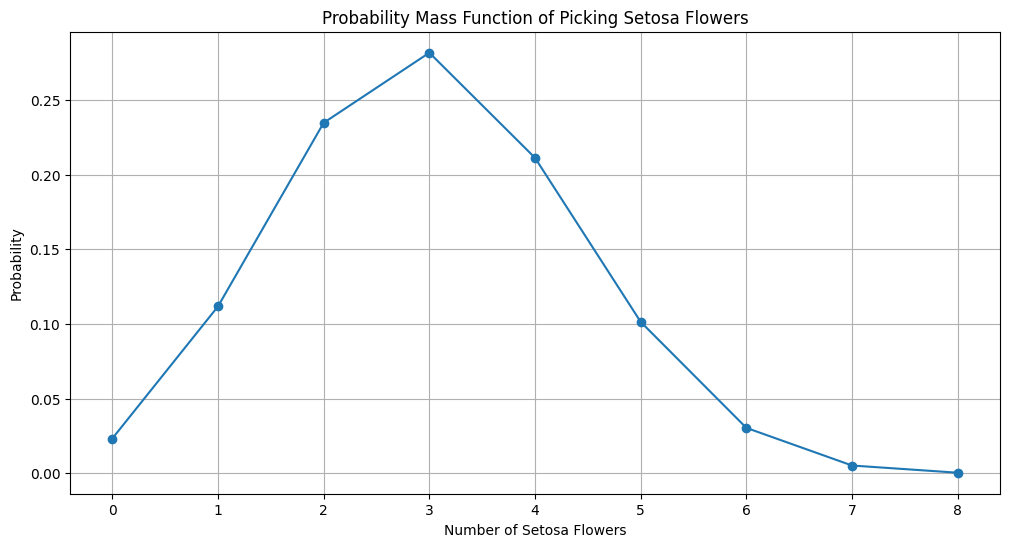

In [13]:
# 4. Plot the probability mass function (PMF) for picking setosa flowers out of 8 picks
ks = np.arange(0, n+1)
pmf_values = binom.pmf(ks, n, p)

plt.figure(figsize=(12, 6))
plt.plot(ks, pmf_values, marker='o')
plt.title('Probability Mass Function of Picking Setosa Flowers')
plt.xlabel('Number of Setosa Flowers')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

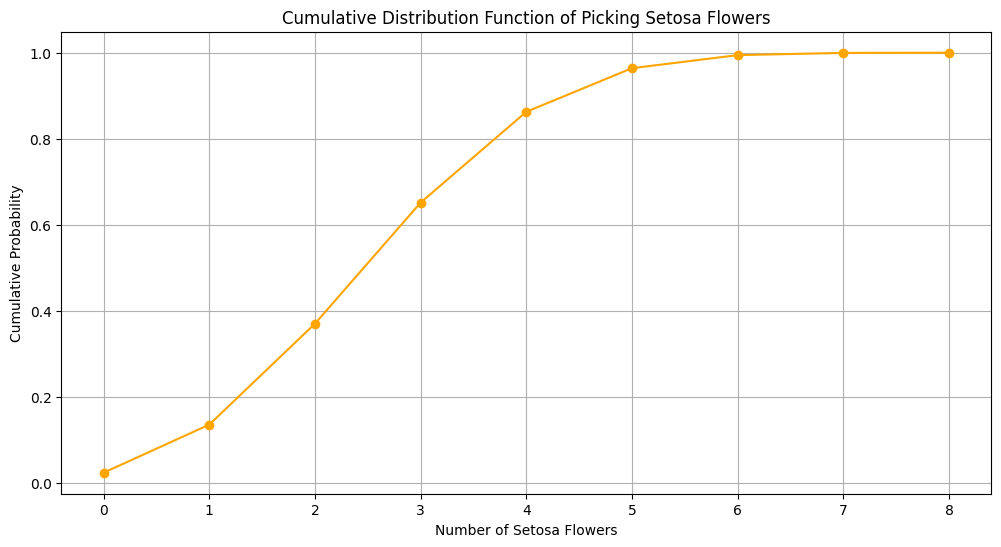

In [14]:
# 5. Plot the cumulative distribution function (CDF) for picking setosa flowers out of 8 picks
cdf_values = binom.cdf(ks, n, p)

plt.figure(figsize=(12, 6))
plt.plot(ks, cdf_values, marker='o', color='orange')
plt.title('Cumulative Distribution Function of Picking Setosa Flowers')
plt.xlabel('Number of Setosa Flowers')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

In [15]:
# 6. What is the probability of picking between 3 and 7 setosa flowers out of 8 picks?
k1, k2 = 3, 7
prob_between_3_and_7_setosa = binom.cdf(k2, n, p) - binom.cdf(k1, n, p)
print(f"Probability of picking between 3 and 7 setosa flowers out of 8 picks: {prob_between_3_and_7_setosa:.6f}")

# Summary
print("\nSummary of probabilities:")
print(f"1. Probability of picking exactly 2 setosa flowers: {prob_2_setosa:.6f}")
print(f"2. Probability of picking 2 or fewer setosa flowers: {prob_2_or_fewer_setosa:.6f}")
print(f"3. Probability of picking more than 4 setosa flowers: {prob_more_than_4_setosa:.6f}")
print(f"4. Probability of picking between 3 and 7 setosa flowers: {prob_between_3_and_7_setosa:.6f}")

Probability of picking between 3 and 7 setosa flowers out of 8 picks: 0.348242

Summary of probabilities:
1. Probability of picking exactly 2 setosa flowers: 0.234693
2. Probability of picking 2 or fewer setosa flowers: 0.369735
3. Probability of picking more than 4 setosa flowers: 0.137409
4. Probability of picking between 3 and 7 setosa flowers: 0.348242


## 2. Poisson Distribution

In [22]:
# Load an inbuilt dataset
# data = sns.load_dataset('tips')

# Display the first few rows of the dataset
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
data['day_time'].value_counts()

KeyError: 'day_time'

In [23]:
from scipy.stats import poisson

# Load an inbuilt dataset
data = sns.load_dataset('tips')

# Display the first few rows of the dataset
data.head()

# Let's assume we are interested in the number of tips received per day.

# Calculate the number of tips (events) and total days
# We'll assume each unique day in the dataset represents a day of observation
data['day_time'] = data['day'].astype('str') + data['time'].astype('str')
total_days = len(data['day_time'].unique())
total_tips = len(data)

# Define the average rate (lambda) of tips per day
lambda_ = total_tips / total_days

# Display the values
print(f"Total days: {total_days}")
print(f"Total tips: {total_tips}")
print(f"Average rate of tips per day (lambda): {lambda_:.4f}")

Total days: 6
Total tips: 244
Average rate of tips per day (lambda): 40.6667


In [24]:
# 1. What is the probability of observing exactly 50 tips in a day?
k = 50
prob_50_tips = poisson.pmf(k, lambda_)
print(f"Probability of observing exactly 50 tips in a day: {prob_50_tips:.6f}")

Probability of observing exactly 50 tips in a day: 0.020775


In [25]:
# 2. What is the probability of observing 40 or fewer tips in a day?
k = 40
prob_40_or_fewer_tips = poisson.cdf(k, lambda_)
print(f"Probability of observing 10 or fewer tips in a day: {prob_40_or_fewer_tips:.6f}")

Probability of observing 10 or fewer tips in a day: 0.500030


In [26]:
# 3. What is the probability of observing more than 15 tips in a day?
k = 15
prob_more_than_15_tips = 1 - poisson.cdf(k, lambda_)
print(f"Probability of observing more than 15 tips in a day: {prob_more_than_15_tips:.6f}")

Probability of observing more than 15 tips in a day: 0.999996


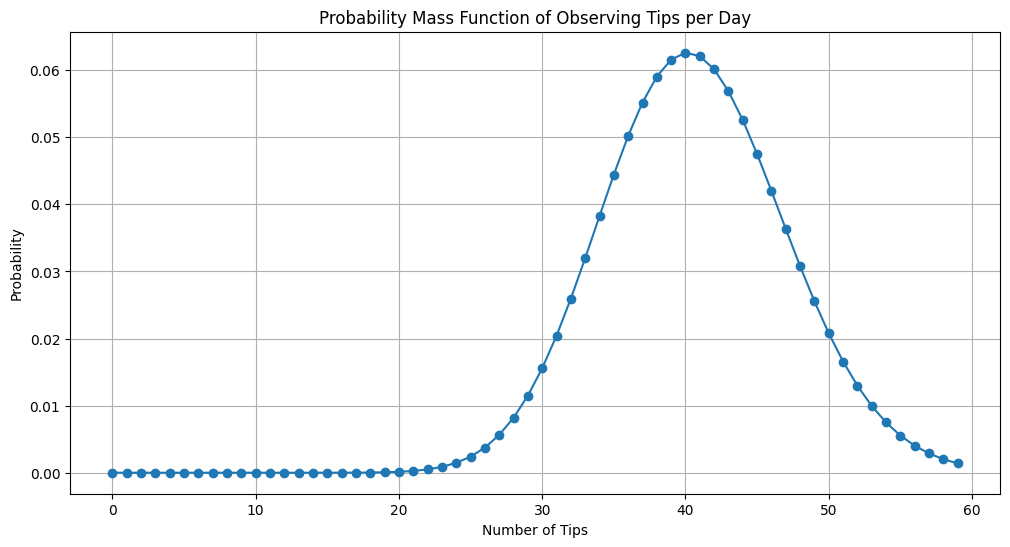

In [27]:
# 4. Plot the probability mass function (PMF) for observing tips in a day
ks = np.arange(0, 60) # Considering a reasonable range for number of tips
pmf_values = poisson.pmf(ks, lambda_)

plt.figure(figsize=(12, 6))
plt.plot(ks, pmf_values, marker='o')
plt.title('Probability Mass Function of Observing Tips per Day')
plt.xlabel('Number of Tips')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

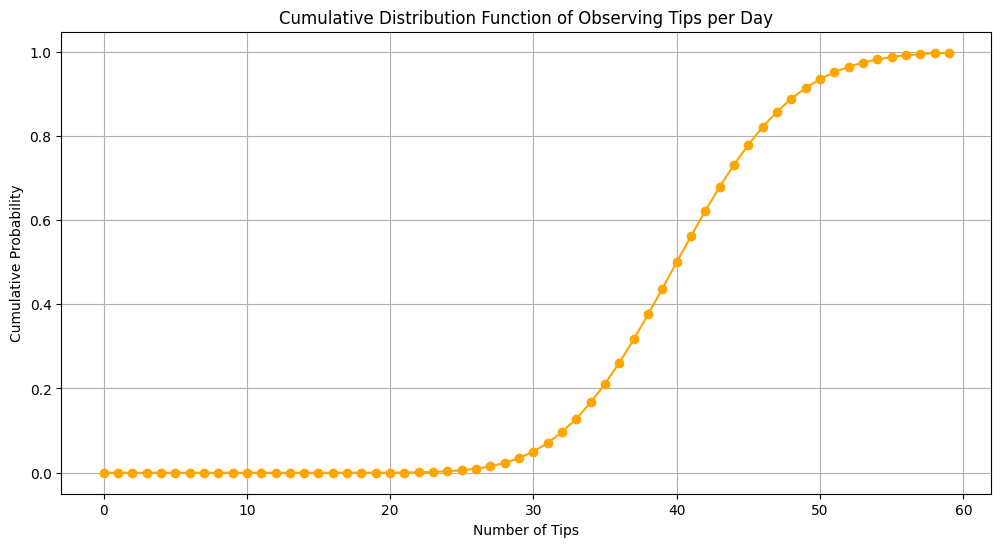

In [28]:
# 5. Plot the cumulative distribution function (CDF) for observing tips in a day
cdf_values = poisson.cdf(ks, lambda_)

plt.figure(figsize=(12, 6))
plt.plot(ks, cdf_values, marker='o', color='orange')
plt.title('Cumulative Distribution Function of Observing Tips per Day')
plt.xlabel('Number of Tips')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

In [29]:
# 6. What is the probability of observing between 40 and 60 tips in a day?
k1, k2 = 40, 60
prob_between_40_and_60_tips = poisson.cdf(k2, lambda_) - poisson.cdf(k1, lambda_)
print(f"Probability of observing between 40 and 60 tips in a day: {prob_between_40_and_60_tips:.6f}")

# Summary
print("\nSummary of probabilities:")
print(f"1. Probability of observing exactly 50 tips: {prob_50_tips:.6f}")
print(f"2. Probability of observing 40 or fewer tips: {prob_40_or_fewer_tips:.6f}")
print(f"3. Probability of observing more than 15 tips: {prob_more_than_15_tips:.6f}")
print(f"4. Probability of observing between 40 and 60 tips: {prob_between_40_and_60_tips:.6f}")

Probability of observing between 40 and 60 tips in a day: 0.498233

Summary of probabilities:
1. Probability of observing exactly 50 tips: 0.020775
2. Probability of observing 40 or fewer tips: 0.500030
3. Probability of observing more than 15 tips: 0.999996
4. Probability of observing between 40 and 60 tips: 0.498233


## 3. Normal Distribution

In [30]:
# Import necessary libraries
from scipy.stats import norm

# Load an inbuilt dataset
# For this example, we'll use the tips dataset from seaborn
import seaborn as sns
data = sns.load_dataset('tips')

# Display the first few rows of the dataset
data.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
# We will perform our Normal distribution analysis on the 'total_bill' column.

# Calculate the mean (mu) and standard deviation (sigma) of the total bills
mu = data['total_bill'].mean()
sigma = data['total_bill'].std()

# Display the values
print(f"Mean of total bills (mu): {mu:.2f}")
print(f"Standard deviation of total bills (sigma): {sigma:.2f}")

Mean of total bills (mu): 19.79
Standard deviation of total bills (sigma): 8.90


In [32]:
# 1. What is the probability of a total bill being exactly $20?
# For a continuous distribution like the normal distribution, the probability of any single point is 0.
# So instead, we calculate the probability of the bill being within a small range around $20.
# We'll use a small range delta.
delta = 0.0001
prob_20_dollars = norm.cdf(20 + delta, mu, sigma) - norm.cdf(20 - delta, mu, sigma)
print(f"Probability of a total bill being exactly $20: {prob_20_dollars:.6f}")

Probability of a total bill being exactly $20: 0.000009


In [33]:
# 2. What is the probability of a total bill being $20 or less?
prob_20_or_less = norm.cdf(20, mu, sigma)
print(f"Probability of a total bill being $20 or less: {prob_20_or_less:.6f}")

Probability of a total bill being $20 or less: 0.509592


In [34]:
# 3. What is the probability of a total bill being more than $30?
prob_more_than_30 = 1 - norm.cdf(30, mu, sigma)
print(f"Probability of a total bill being more than $30: {prob_more_than_30:.6f}")

Probability of a total bill being more than $30: 0.125621


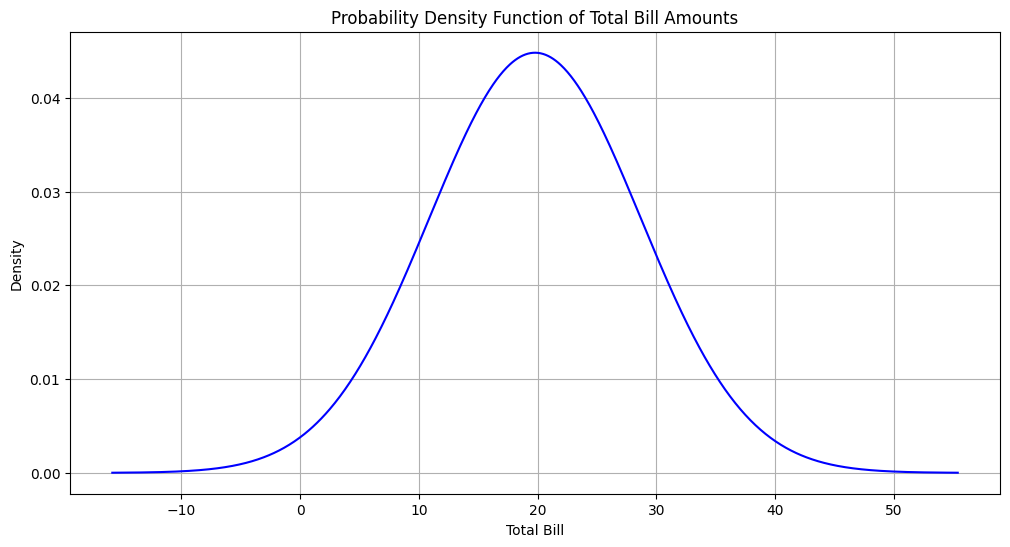

In [35]:
# 4. Plot the probability density function (PDF) for total bill amounts
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf_values = norm.pdf(x, mu, sigma)

plt.figure(figsize=(12, 6))
plt.plot(x, pdf_values, color='blue')
plt.title('Probability Density Function of Total Bill Amounts')
plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.grid(True)
plt.show()

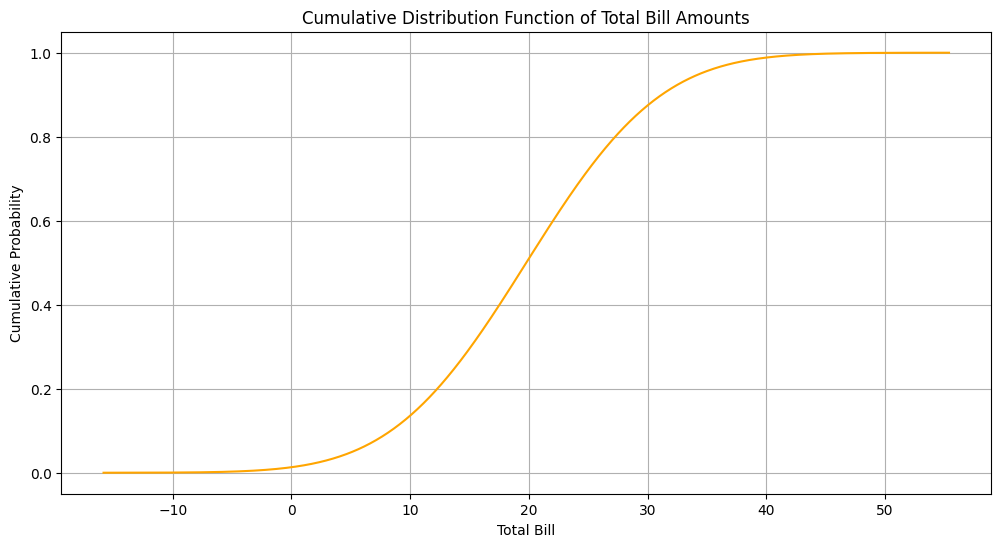

In [36]:
# 5. Plot the cumulative distribution function (CDF) for total bill amounts
cdf_values = norm.cdf(x, mu, sigma)

plt.figure(figsize=(12, 6))
plt.plot(x, cdf_values, color='orange')
plt.title('Cumulative Distribution Function of Total Bill Amounts')
plt.xlabel('Total Bill')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

In [37]:
# 6. What is the probability of a total bill being between $15 and $25?
prob_between_15_and_25 = norm.cdf(25, mu, sigma) - norm.cdf(15, mu, sigma)
print(f"Probability of a total bill being between $15 and $25: {prob_between_15_and_25:.6f}")

Probability of a total bill being between $15 and $25: 0.425532


In [38]:
# Summary
print("\nSummary of probabilities:")
print(f"1. Probability of a total bill being exactly $20: {prob_20_dollars:.6f}")
print(f"2. Probability of a total bill being $20 or less: {prob_20_or_less:.6f}")
print(f"3. Probability of a total bill being more than $30: {prob_more_than_30:.6f}")
print(f"4. Probability of a total bill being between $15 and $25: {prob_between_15_and_25:.6f}")


Summary of probabilities:
1. Probability of a total bill being exactly $20: 0.000009
2. Probability of a total bill being $20 or less: 0.509592
3. Probability of a total bill being more than $30: 0.125621
4. Probability of a total bill being between $15 and $25: 0.425532
